In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

In [2]:
def match_data_to_labels(train, labels):
    columns_names=list(train.columns) + list(labels.columns)
    df = pd.DataFrame(np.zeros([labels.shape[0], train.shape[1]+1]), columns=columns_names, index=labels.index)
    for _id, seq in df.iterrows():
        for item in columns_names[:-1]:
            seq[item] = train.at[_id, item]
        seq["label"] = labels.at[_id,"label"]
    return df


In [3]:
raw_data = pd.read_csv("training_data/features.csv").drop_duplicates(subset=["id"],keep="first").set_index("id")
labels = pd.read_csv("sequence_labels.csv").drop_duplicates(subset=["id"],keep="first").set_index("id")
data = match_data_to_labels(raw_data, labels)
features = data.columns.values[:-1]
data.head()


,avg_speed,min_speed,max_speed,max_accel,max_deaccel,med_speed,med_accel,sd_speed,sd_accel,percent_ped_speed,percent_bic_speed,percent_car_speed,num_stops,sinuosity,distance,duration,label
id,,,,,,,,,,,,,,,,,
6lmxhlsdu2820pp9ewk41z,16.092218,0.232964,25.961550,10.652202,-13.501058,12.864293,12.076630,5.964283,2.795336,0.697674,6.279070,86.511628,0.0,1.037741,7917.451715,492.005,2.0
g234mtreigui4a64i4xea9,6.322339,0.141193,12.872192,3.198201,-6.585177,6.365499,4.891689,2.824493,1.406421,0.735294,20.588235,36.764706,2.0,1.007190,1132.324604,179.099,2.0
hwt93drmgmyk3pnt7hib08,1.275309,0.620147,2.196088,1.129826,-7.976933,0.787971,4.553379,0.274747,0.971887,67.193676,0.000000,0.000000,0.0,2.232828,366.273853,287.204,0.0
9gmnn1cdfv7vbptl9p83u2,1.210824,0.079203,2.395365,1.275051,-4.657094,1.158081,2.966073,0.336322,0.656864,60.103627,0.000000,0.000000,4.0,1.304693,562.095759,464.226,0.0
18ejk5cjxixj051qiupxyb,1.313297,0.637032,2.017232,1.256552,-2.369025,0.690100,1.812788,0.291555,0.574907,57.831325,0.000000,0.000000,0.0,1.040797,126.595226,96.395,0.0


0.0    244
1.0    116
2.0     86
Name: label, dtype: int64

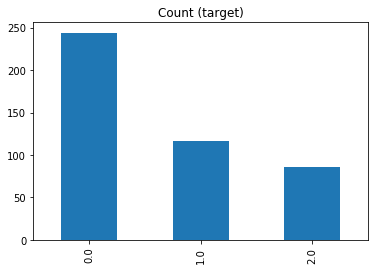

In [4]:
data.label.value_counts().plot(kind='bar', title='Count (target)')
data.label.value_counts()

,avg_speed,min_speed,max_speed,max_accel,max_deaccel,med_speed,med_accel,sd_speed,sd_accel,percent_ped_speed,percent_bic_speed,percent_car_speed,num_stops,sinuosity,distance,duration
avg_speed,1.000000,0.829287,0.507611,0.179062,-0.474213,0.380769,0.342483,0.721296,0.598470,-0.323633,-0.027827,0.722478,0.043702,-0.020571,0.275303,-0.067298
min_speed,0.829287,1.000000,0.311747,0.011590,-0.274082,0.146449,0.151754,0.398088,0.355261,-0.143621,-0.093592,0.458008,-0.042134,-0.007655,-0.011824,-0.124862
max_speed,0.507611,0.311747,1.000000,0.916447,-0.957129,0.985576,0.970224,0.845754,0.909600,-0.231340,-0.010016,0.392651,0.671085,-0.015827,0.358506,0.019275
max_accel,0.179062,0.011590,0.916447,1.000000,-0.866746,0.952050,0.964098,0.631168,0.787206,-0.148866,0.001155,0.190270,0.755664,-0.010985,0.351196,0.062803
max_deaccel,-0.474213,-0.274082,-0.957129,-0.866746,1.000000,-0.947651,-0.968069,-0.876997,-0.954252,0.175615,0.036146,-0.311218,-0.711816,0.010867,-0.232461,0.019074
med_speed,0.380769,0.146449,0.985576,0.952050,-0.947651,1.000000,0.983073,0.809612,0.883710,-0.215268,0.006242,0.327213,0.706172,-0.015115,0.375347,0.042307
med_accel,0.342483,0.151754,0.970224,0.964098,-0.968069,0.983073,1.000000,0.784173,0.903733,-0.168325,-0.018664,0.261334,0.758801,-0.011307,0.300286,0.021410
sd_speed,0.721296,0.398088,0.845754,0.631168,-0.876997,0.809612,0.784173,1.000000,0.930294,-0.272098,-0.015527,0.515030,0.491075,-0.017418,0.315378,-0.018475
sd_accel,0.598470,0.355261,0.909600,0.787206,-0.954252,0.883710,0.903733,0.930294,1.000000,-0.209589,-0.039816,0.400671,0.646363,-0.013716,0.270680,-0.021907
percent_ped_speed,-0.323633,-0.143621,-0.231340,-0.148866,0.175615,-0.215268,-0.168325,-0.272098,-0.209589,1.000000,-0.555007,-0.430149,-0.157998,-0.047345,-0.373876,-0.017590


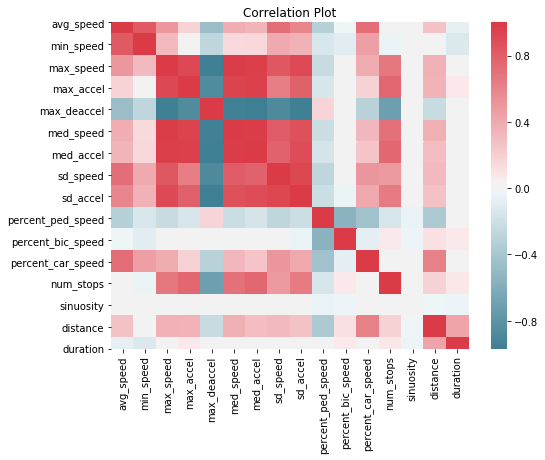

In [5]:
cor = data[features].corr(method="pearson")
display(pd.DataFrame(cor))
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=ax)
plt.show()